In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

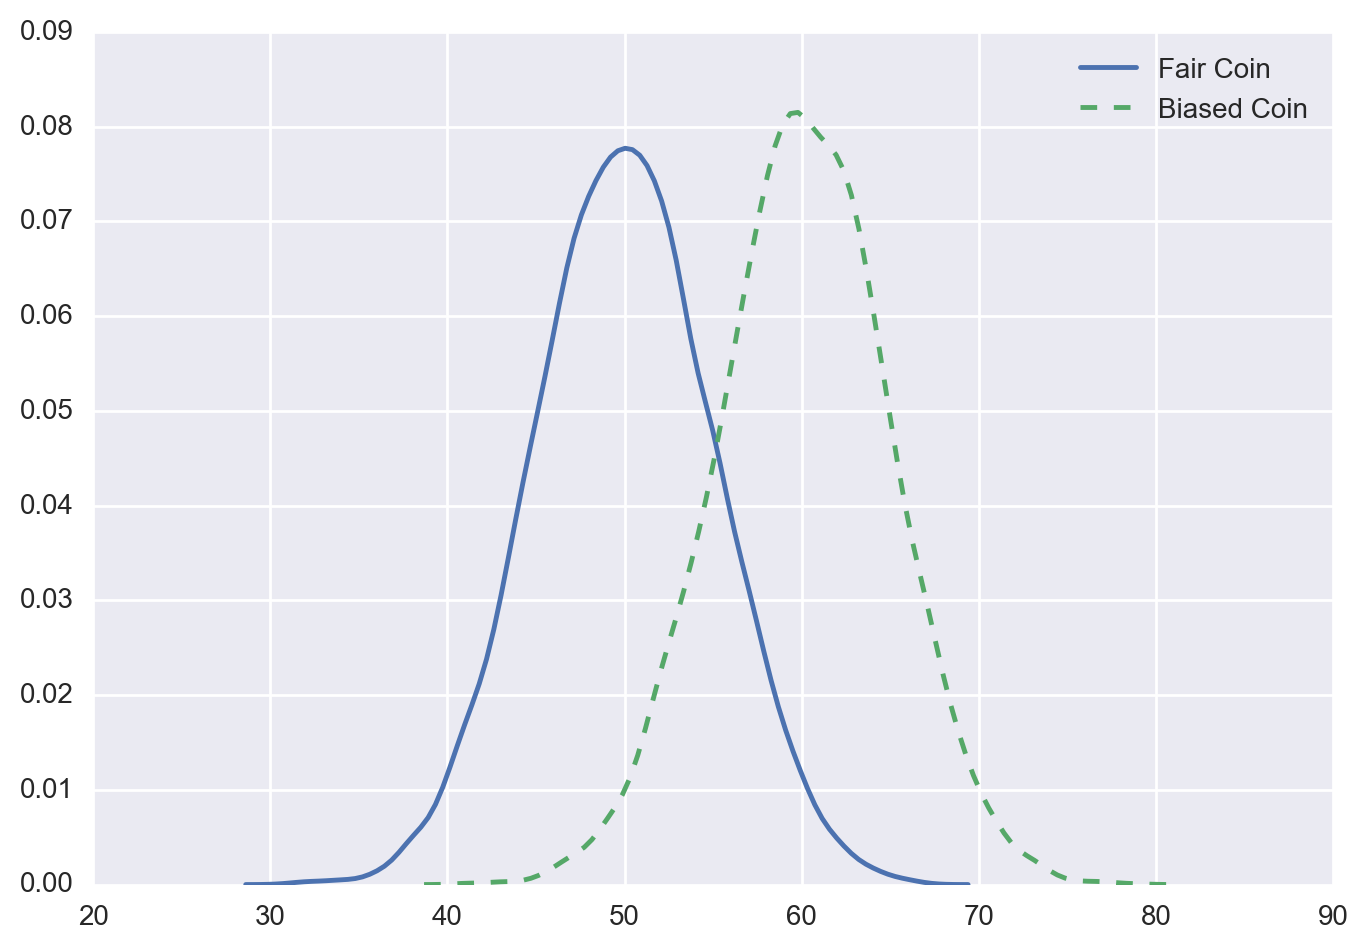

In [5]:
def flip(n, trials=100, p=0.5):
    return [sum(np.random.sample(trials) < p) for i in range(n)]

sns.distplot(flip(10000, p=0.5), hist=False, label="Fair Coin")
with plt.rc_context(rc={'lines.linestyle': '--'}):
    sns.distplot(flip(10000, p=0.6), hist=False, label="Biased Coin")

In the following cell, we'll use simulation to calculate the power for a specific number of trials.

In [7]:
def factorial(n):
    """Calculates the factorial of `n`
    """
    vals = list(range(1, n + 1))
    if len(vals) <= 0:
        return 1

    prod = 1
    for val in vals:
        prod *= val
        
    return prod
    
    
def n_choose_k(n, k):
    """Calculates the binomial coefficient
    """
    return factorial(n) / (factorial(k) * factorial(n - k))


def binom_prob(n, k, p):
    """Returns the probability of see `k` heads in `n` coin tosses
    
    Arguments:
    
    n - number of trials
    k - number of trials in which an event took place
    p - probability of an event happening
    
    """
    return n_choose_k(n, k) * p**k * (1 - p)**(n - k)

def p_value(n, k, p):
    """Returns the p-value for the given the given set 
    """
    return sum(binom_prob(n, i, p) for i in range(k, n+1))

In [47]:
p = 0.4
trials = 1000
n = 100
sum(p_value(trials, k, p) < 0.05 for k in flip(n, trials=trials, p=p))

7